<a href="https://colab.research.google.com/github/gagao9815/BinSearchEx/blob/master/Copy_of_STA365_new_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Retrived from kaggle: https://www.kaggle.com/datasets/zain280/titanic-data-set
Group 12 Member: Chengfeng Zhang; Rosie Huang; Yihe Gao;

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import scipy as spy
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import preprocessing
from scipy.stats import zscore
import arviz as az

# Introduction

**Background**:


On April 15, 1912, the Titanic, tragically sank following a collision with an iceberg. Unfortunately, the insufficient number of lifeboats led to the loss of 1502 lives out of the 2224 passengers and crew aboard.Evidently, certain demographics exhibited higher survival rates than others.

**Goal:**

To construct a Bayesian predictive model to determine the most influential predictor variable among age, sex, and passenger class

In [ ]:
# #Exploratory Data Analysis
Titanic_data = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PART 1: DATA

Y-variable: Survived: Indicates whether the passenger survived (1 for survived, 0 for not survived).

X-variables:

1. Pclass: Ticket class categorized as 1 for 1st class, 2 for 2nd class, and 3 for 3rd class.
2. Age: Numerical data representing age.
3. Sex: Categorical data indicating biological sex ( 1 for males, 0 for females )

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([17.74810926, 18.36016823, 18.9722272 , 19.58428616, 20.19634513,
        20.8084041 , 21.42046306, 22.03252203, 22.64458099, 23.25663996,
        23.86869893]),
 <BarContainer object of 10 artists>)

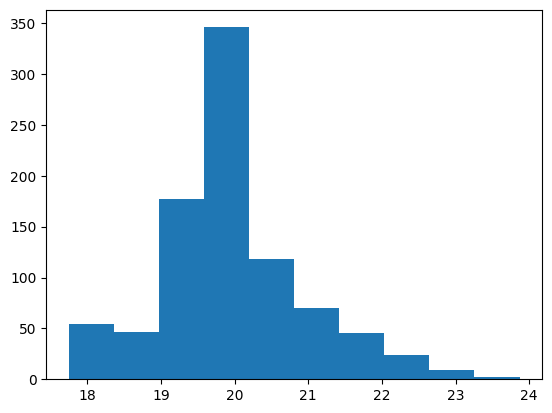

In [ ]:
#Standardize data
Titanic_data['Age'] = ((Titanic_data['Age']-Titanic_data['Age'].mean())/Titanic_data['Age'].std())+20
plt.hist(Titanic_data['Age'])

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

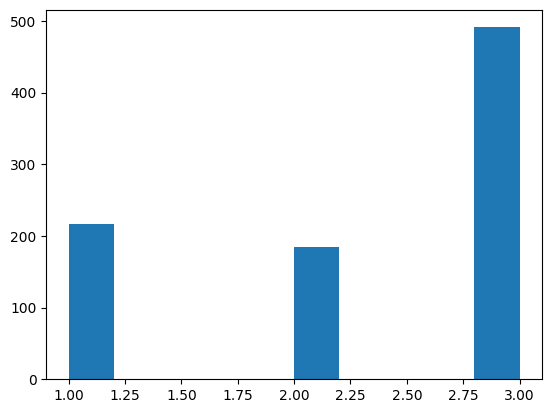

In [ ]:
plt.hist(Titanic_data['Pclass'])

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

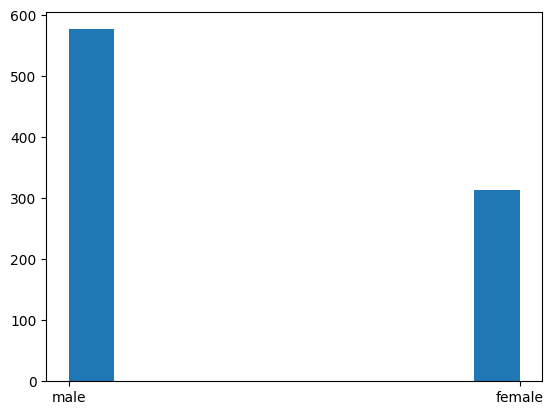

In [ ]:
plt.hist(Titanic_data['Sex'])

In [ ]:
#Filling missing value in Age with the average of the column
imputer = SimpleImputer(strategy='mean')
Titanic_data['Age'] = imputer.fit_transform(Titanic_data[['Age']])

#Assigning outcome Y
Outcome = Titanic_data["Survived"]

#Dropping irrelevant columns
Titanic_x_data = Titanic_data.drop(columns=\
['PassengerId','Survived','Name','Ticket','Cabin','Embarked','Survived','SibSp','Parch','Fare'])
Titanic_x_data['Sex'].replace({'female': 0, 'male': 1}, inplace=True)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([17.74810926, 18.36016823, 18.9722272 , 19.58428616, 20.19634513,
        20.8084041 , 21.42046306, 22.03252203, 22.64458099, 23.25663996,
        23.86869893]),
 <BarContainer object of 10 artists>)

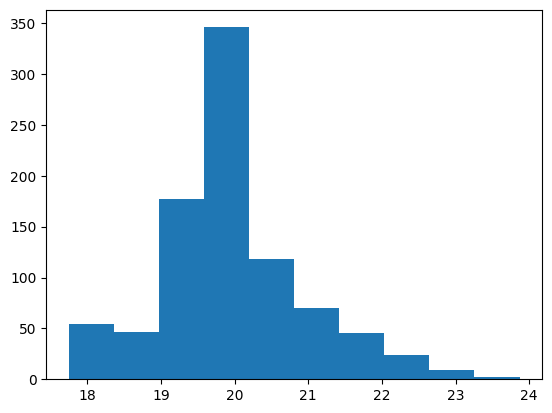

In [ ]:
#Standardize data
Titanic_data['Age'] = ((Titanic_data['Age']-Titanic_data['Age'].mean())/Titanic_data['Age'].std())+20
plt.hist(Titanic_data['Age'])

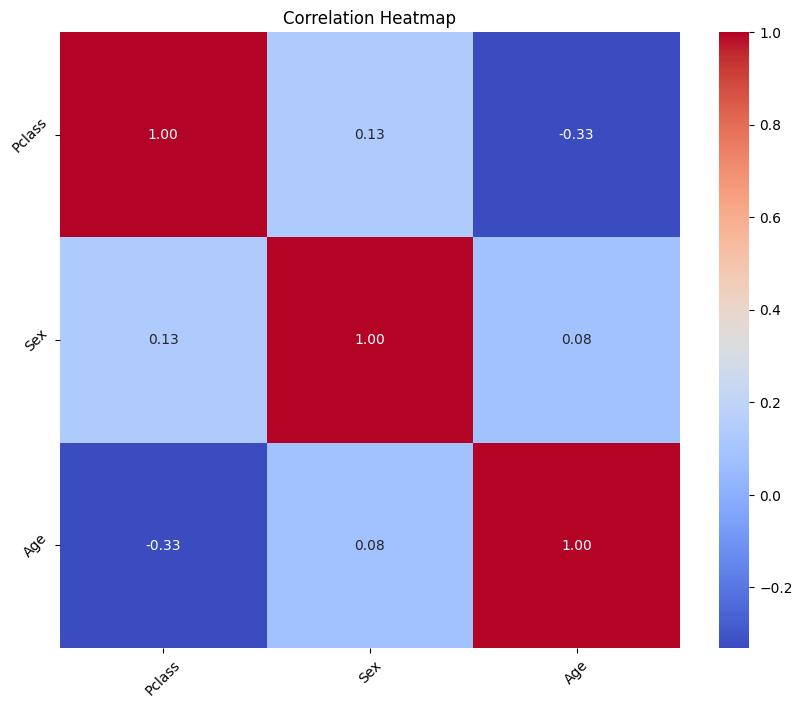

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(Titanic_x_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Display the plot
plt.show()

# PART 2 : MODELLING


Three models:

1. Pooled model with mutivariated normal distributed prior
2. Hierarchical model with multivariate normal distributed prior beta and LKJ prior
3. Lasso regression model with laplace distributed prior

Assumptions for normal distributed prior:
1. Coefficients (beta) follow  normal distribution.
2. Coefficients should be continuous.
3. The prior mean is set at zero

MODEL 1: Pooled model with mutivariated normal distributed prior


In [ ]:
X = Titanic_x_data.values
y = Outcome.values

#pooled model
with pm.Model() as logistic_model_p:
    # Define priors
    beta = pm.MvNormal('beta', mu=np.zeros(X.shape[1]), cov=np.eye(X.shape[1]), shape=X.shape[1])

    # Define likelihood
    p = pm.Deterministic('p', pm.math.invlogit(pm.math.dot(X, beta)))
    observed = pm.Bernoulli('observed', p=p, observed=y);

In [ ]:
with logistic_model_p:
    # Use MCMC sampling
    trace_p = pm.sample(1000)

Model 2:  Hierarchical model with multivariate normal distributed prior and LKJ prior

In [ ]:
with pm.Model() as logistic_model_hie:
  alpha = pm.Normal("alpha", mu = 0, sigma = 10)
  packed_L = pm.LKJCholeskyCov(
            "packed_L", n= X.shape[1], eta=2.0, sd_dist=pm.Exponential.dist(1.0, shape=X.shape[1]), compute_corr=False)
  L = pm.expand_packed_triangular(X.shape[1], packed_L)

  beta = pm.MvNormal("beta", mu = 0, chol=L, shape=X.shape[1])

  # Non-centered parameterization of random effect
  mu = alpha + pm.math.dot(X, beta)
  p = pm.Deterministic("likelihood",pm.math.invlogit(mu))
  observed = pm.Bernoulli('obs', p=p, observed= y)

In [ ]:
with logistic_model_lkj:
    trace_h_085 = pm.sample(draws=1000,target_accept=0.85,random_seed=365)

MODEL 3: Lasso regression model with laplace distributed prior

In [ ]:
#Fitting lasso regression model
with pm.Model() as logistic_model_lasso:

    beta = pm.Laplace('beta', mu=0, b=1,shape=(X.shape[1]))
    beta0 = pm.Normal('beta0', mu=0, sigma=10)

    mu = beta0 + pm.math.dot(X, beta)
    p = pm.Deterministic("likelihood",pm.math.invlogit(mu))
    observed = pm.Bernoulli('obs', p=p, observed=Outcome)

In [ ]:
with logistic_model_lasso:
    trace_l_085 = pm.sample(draws=1000,target_accept=0.85,random_seed=365)

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

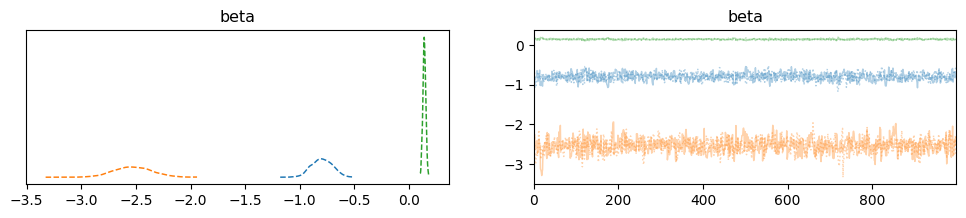

In [ ]:
az.plot_trace(trace_p,combined=True , var_names=['beta'])

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

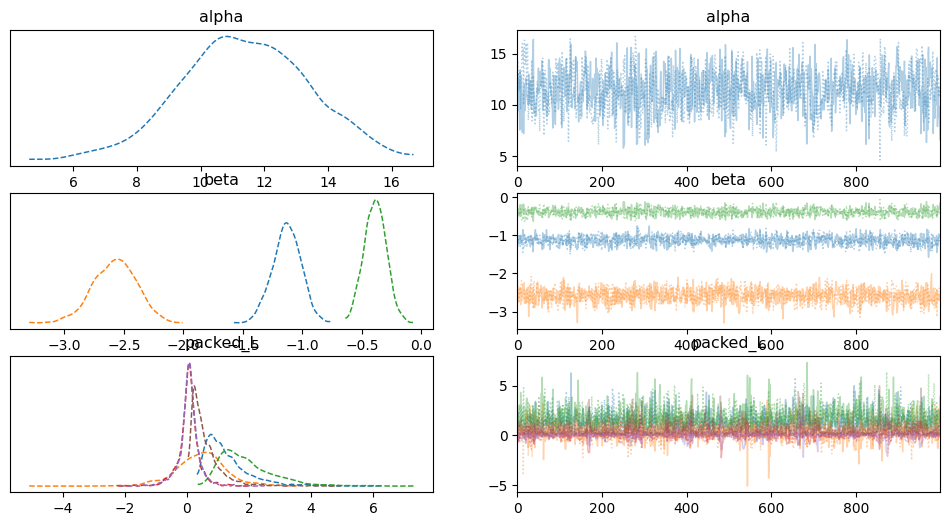

In [ ]:
az.plot_trace(trace_h_085, combined=True,var_names=['alpha','beta','packed_L'])

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>]], dtype=object)

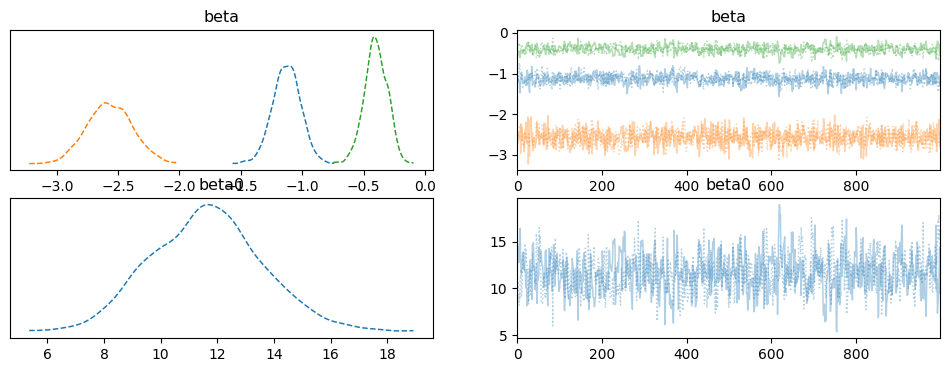

In [ ]:
az.plot_trace(trace_l_085,combined=True, var_names = ['beta','beta0'])

In [ ]:
with logistic_model_lasso:
    pm.compute_log_likelihood(trace_l_085)

In [ ]:
with logistic_model_lasso:
    pm.compute_log_likelihood(trace_h_085)

In [ ]:
with logistic_model_p:
    pm.compute_log_likelihood(trace_p)

(              rank    elpd_loo     p_loo  elpd_diff    weight         se  \
 hierarchical     0 -406.784119  4.109419   0.000000  0.475791  17.086514   
 lasso            1 -406.784119  4.109419   0.000000  0.475791  17.086514   
 pooled           2 -435.517164  2.887442  28.733045  0.048417  16.510842   
 
                    dse  warning scale  
 hierarchical  0.000000    False   log  
 lasso         0.000000    False   log  
 pooled        7.897717    False   log  ,
 <Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>)

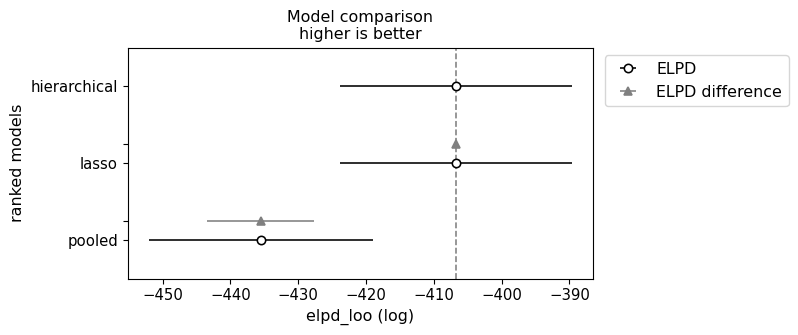

In [ ]:
comp_loo = az.compare({"hierarchical": trace_h_085, "pooled": trace_p,"lasso":trace_l_085},ic='loo')
comp_loo, az.plot_compare(comp_loo, insample_dev=False)

(              rank   elpd_waic    p_waic  elpd_diff    weight         se  \
 hierarchical     0 -406.771434  4.096734   0.000000  0.475853  17.085815   
 lasso            1 -406.771434  4.096734   0.000000  0.475853  17.085815   
 pooled           2 -435.509030  2.879308  28.737596  0.048294  16.510436   
 
                    dse  warning scale  
 hierarchical  0.000000    False   log  
 lasso         0.000000    False   log  
 pooled        7.897154    False   log  ,
 <Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_waic (log)', ylabel='ranked models'>)

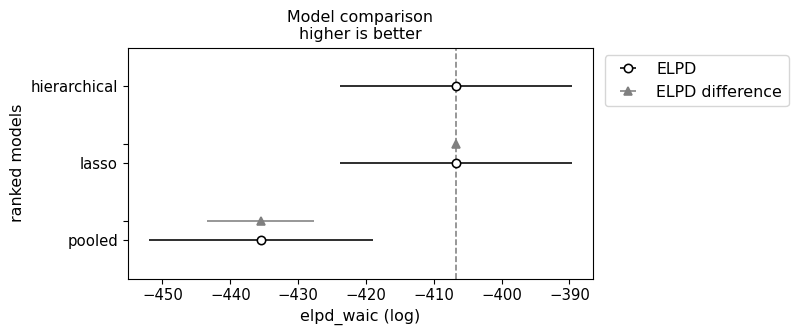

In [ ]:
comp_loo = az.compare({"hierarchical": trace_h_085, "pooled": trace_p,"lasso":trace_l_085},ic='waic')
comp_loo, az.plot_compare(comp_loo, insample_dev=False)

Best model selection :Although 'hierarchical' and 'lasso' have the same loocv and waic value. However, Laplace distributed prior assumes betas show a heavy-tailed distribution, which is less reasonable in our case. Therefore, we choose a hierarchical model with multivariate normal distributed prior as our best Model.

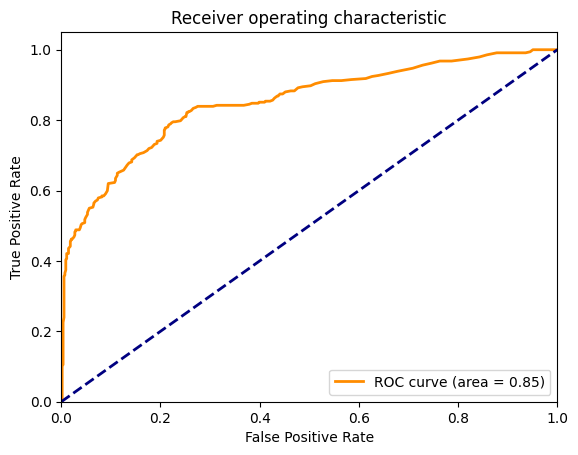

In [ ]:
from sklearn.metrics import roc_curve, auc

with logistic_model_hierarchical:
    # Generate posterior predictive samples
    ppc = pm.sample_posterior_predictive(trace_h_085, var_names=['obs'])


predicted_probabilities = ppc.posterior_predictive["obs"].mean(axis=(0, 1))

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

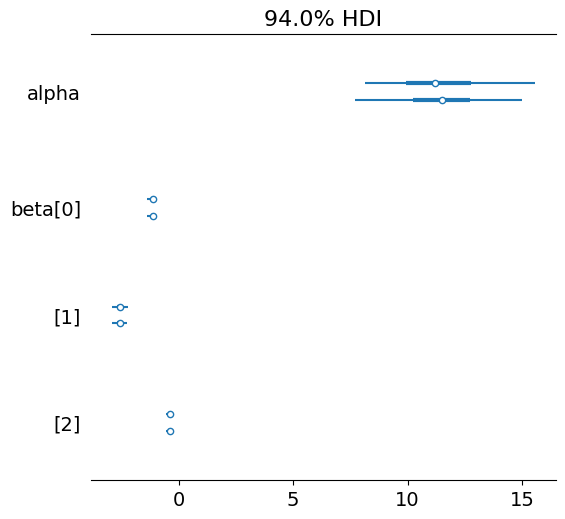

In [ ]:
az.plot_forest(trace_h_085, var_names=['alpha','beta'])

In [ ]:
az.summary(trace_h_085,var_names = 'beta')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],-1.131,0.118,-1.366,-0.934,0.004,0.003,1021.0,1320.0,1.0
beta[1],-2.578,0.181,-2.906,-2.227,0.005,0.004,1261.0,1314.0,1.0
beta[2],-0.388,0.092,-0.562,-0.221,0.003,0.002,826.0,1367.0,1.0


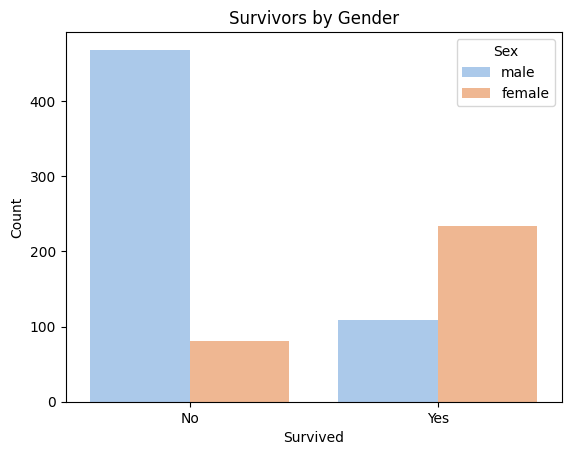

In [ ]:
#Plotting histogram of survivors by gender
sns.countplot(data=Titanic_data, x='Survived', hue='Sex', palette='pastel')

# Replace x-axis labels 0 and 1 with 'No' and 'Yes'
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Gender')

# Show the plot
plt.show()

# Conclusion
Biological sex is the most influential predictor over age and passenger class for survival rate on the Titanic, as indicated by the largest absolute value of the coefficient. In addition, Women are more likely to survive than men.